In [1]:
import jax
import jax.numpy as jnp
import jax.random as jrand

import matplotlib.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


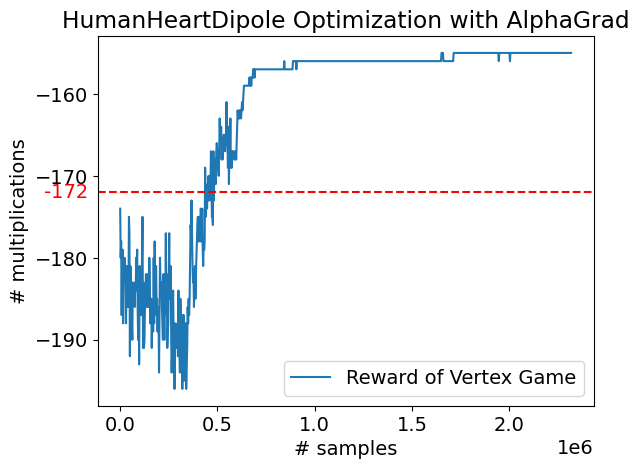

In [2]:
font = {"family" : "normal",
        "weight" : "normal",
        "size"   : 14}

plt.rc('font', **font)


data = np.genfromtxt("HumanHeartDipole_A0_good_run.csv", delimiter=",", skip_header=1)
num_samples = data[:, 0]*32*78 
num_muls = data[:, 1]

fig, ax = plt.subplots()
ax.plot(num_samples, num_muls, label="Reward of Vertex Game")
ax.axhline(y=-172., color='r', linestyle='--')
ax.set_xlabel("# samples")
ax.set_ylabel("# multiplications")
ax.set_title("HumanHeartDipole Optimization with AlphaGrad")

trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0,-172., "{:.0f}".format(-172.), color="red", transform=trans, 
        ha="right", va="center")
ax.legend()

In [3]:
import graphax
from graphax import jacve
from graphax.perf import plot_performance
from graphax.examples import HumanHeartDipole

In [4]:
# 155 mults
order = [3, 45, 61, 29, 5, 28, 33, 54, 51, 53, 25, 63, 1, 19, 17, 18, 15, 13, 11, 
16, 14, 40, 37, 31, 30, 27, 32, 41, 10, 9, 8, 7, 6, 64, 49, 24, 44, 26, 77, 76, 
75, 74, 73, 72, 43, 42, 39, 79, 2, 71, 21, 23, 69, 66, 48, 47, 46, 56, 59, 85, 
84, 36, 35, 34, 52, 80, 57, 58, 60, 62, 55, 68, 83, 82, 67, 81, 65, 70, 22] 

mM_order = [21, 22, 24, 25, 28, 34, 40, 46, 51, 52, 53, 56, 57, 58, 61, 62, 63, 
            66, 67, 68, 1, 3, 5, 6, 8, 10, 13, 14, 16, 18, 27, 29, 32, 35, 37, 
            39, 41, 44, 47, 49, 54, 59, 64, 69, 71, 72, 74, 76, 79, 80, 82, 84, 
            9, 17, 30, 33, 36, 42, 45, 48, 75, 83, 7, 15, 23, 26, 31, 43, 55, 
            60, 65, 70, 73, 81, 11, 19, 77, 85] 

In [16]:
key = jrand.PRNGKey(42)
shape = (512,)
xs = [.01, .03, .02, .0112, .06, .04, .07, .099]
xs = [jrand.uniform(key, shape)*x for x in xs]
xs = jax.device_put(xs, jax.devices("cpu")[0])
HumanHeartDipole(*xs)

(Array([-0.9676056 , -0.984595  , -0.97307706, -0.97889614, -0.97216463,
        -0.9646186 , -0.99772924, -0.96178436, -0.9784801 , -0.9614124 ,
        -0.9867246 , -0.9678472 , -0.9966013 , -0.99661845, -0.9756957 ,
        -0.99077386, -0.99196434, -0.9638022 , -0.9791845 , -0.98391896,
        -0.96769667, -0.9602833 , -0.98074883, -0.99500287, -0.9841962 ,
        -0.98128015, -0.9833594 , -0.9975779 , -0.9624574 , -0.96309125,
        -0.97236353, -0.98155355, -0.9631246 , -0.98116225, -0.97512066,
        -0.97208244, -0.9837958 , -0.9925284 , -0.9844956 , -0.98807514,
        -0.96878225, -0.9791126 , -0.9860835 , -0.9869385 , -0.9997464 ,
        -0.96636283, -0.968409  , -0.9669562 , -0.96815634, -0.9673913 ,
        -0.9971656 , -0.9654215 , -0.97575396, -0.9709341 , -0.97167283,
        -0.9704624 , -0.9955065 , -0.9794424 , -0.9839417 , -0.9810218 ,
        -0.9999974 , -0.9676548 , -0.9777923 , -0.9900516 , -0.9603514 ,
        -0.9623436 , -0.9802496 , -0.99368054, -0.9

  0%|          | 0/10000 [00:00<?, ?it/s]

1 : 1024
3 : 1024
5 : 1024
6 : 1024
7 : 2048
8 : 1024
9 : 3072
10 : 1024
11 : 4096
13 : 1024
14 : 1024
15 : 2048
16 : 1024
17 : 3072
18 : 1024
19 : 4096
21 : 512
22 : 512
23 : 2048
24 : 512
25 : 512
26 : 2048
27 : 1536
28 : 512
29 : 1024
SparseTensor: 
   shape = (512, 512),
   out_dims = (SparseDimension(id=0, size=512, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=512, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[512])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []
 SparseTensor: 
   shape = (512, 512),
   out_dims = (SparseDimension(id=0, size=512, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=512, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[512])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []

[1] [1] (SparseDimension(id=0, size=512, val_dim=0, other_id=1), SparseDimension(id=1, size=512, val_dim=0, other_id=0))
SparseTensor: 


  0%|          | 0/10000 [00:00<?, ?it/s]

85 : 1024
84 : 1024
83 : 1024
82 : 1024
81 : 1024
80 : 1024
79 : 1024
77 : 1024
76 : 1024
75 : 1024
74 : 1024
73 : 1024
72 : 1024
71 : 1024
70 : 2048
69 : 2048
68 : 1024
67 : 1024
SparseTensor: 
   shape = (512, 512),
   out_dims = (SparseDimension(id=0, size=512, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=512, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[512])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []
 SparseTensor: 
   shape = (512, 512),
   out_dims = (SparseDimension(id=0, size=512, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=512, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[512])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []

[1] [1] (SparseDimension(id=0, size=512, val_dim=0, other_id=1), SparseDimension(id=1, size=512, val_dim=0, other_id=0))
SparseTensor: 
   shape = (512, 512),
   out_dims = (SparseDimension(id=0

  0%|          | 0/10000 [00:00<?, ?it/s]

21 : 512
22 : 512
24 : 512
25 : 512
28 : 512
34 : 512
40 : 512
46 : 512
51 : 512
52 : 512
53 : 512
56 : 512
57 : 512
58 : 512
61 : 512
62 : 512
63 : 512
66 : 512
67 : 512
68 : 512
1 : 1024
3 : 1024
5 : 1024
6 : 1024
8 : 1024
10 : 1024
13 : 1024
14 : 1024
16 : 1024
18 : 1024
27 : 1024
29 : 1024
32 : 1024
35 : 1024
37 : 1024
39 : 1024
41 : 1024
44 : 1024
47 : 1024
49 : 1024
SparseTensor: 
   shape = (512, 512),
   out_dims = (SparseDimension(id=0, size=512, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=512, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[512])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []
 SparseTensor: 
   shape = (512, 512),
   out_dims = (SparseDimension(id=0, size=512, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=512, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[512])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []


  0%|          | 0/10000 [00:00<?, ?it/s]

3 : 1024
45 : 1024
61 : 512
29 : 1024
5 : 1024
28 : 512
33 : 1024
54 : 1024
SparseTensor: 
   shape = (512, 512),
   out_dims = (SparseDimension(id=0, size=512, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=512, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[512])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []
 SparseTensor: 
   shape = (512, 512),
   out_dims = (SparseDimension(id=0, size=512, val_dim=0, other_id=1),),
   primal_dims = (SparseDimension(id=1, size=512, val_dim=0, other_id=0),),
   val = Traced<ShapedArray(float32[512])>with<DynamicJaxprTrace(level=1/0)>,
   pre_transforms = []
   post_transforms = []

[1] [1] (SparseDimension(id=0, size=512, val_dim=0, other_id=1), SparseDimension(id=1, size=512, val_dim=0, other_id=0))
51 : 512
53 : 512
25 : 512
63 : 512
1 : 1024
19 : 1024
17 : 1024
18 : 1024
15 : 1024
13 : 1024
11 : 1024
16 : 1024
14 : 1024
40 : 512
37 : 1536
31 : 1024
30 : 1536
27 : 1024
32 

100%|██████████| 10000/10000 [03:26<00:00, 48.47it/s]


fwd mean: 17.001935958862305, rev mean: 17.04908561706543, mM_mean: 16.9298152923584, cc_mean: 17.322284698486328
fwd err: [-2.9367657  1.7320194], rev err: [-3.2324028  1.4550304], mM_std: [-1.4534845   0.93920517], cc_std: [-4.6444473  2.9694366]
[[2.9367657  3.2324028  1.4534845  4.6444473 ]
 [1.7320194  1.4550304  0.93920517 2.9694366 ]] (2, 4)


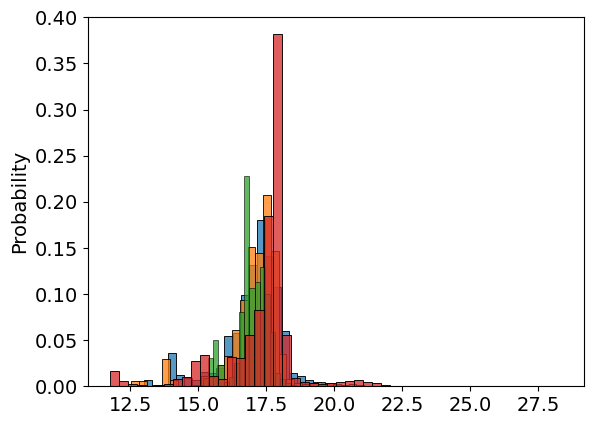

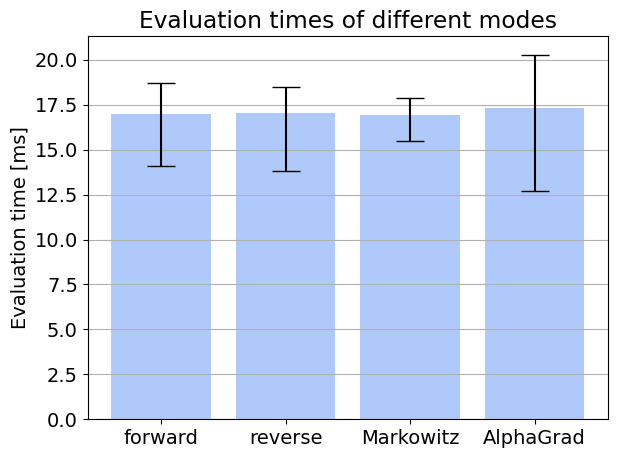

In [17]:
plot_performance(HumanHeartDipole, xs, order, mM_order, "./HumanHeartDipole.png", samplesize=1000)

### Best result so far
fwd mean: 22.210901260375977, rev mean: 21.866714477539062, mM_mean: 22.148378372192383, cc_mean: 21.721221923828125, 
fwd std: 0.9053686857223511, rev std: 1.4071205854415894, mM_std: 1.225785493850708, cc_std: 1.6902588605880737

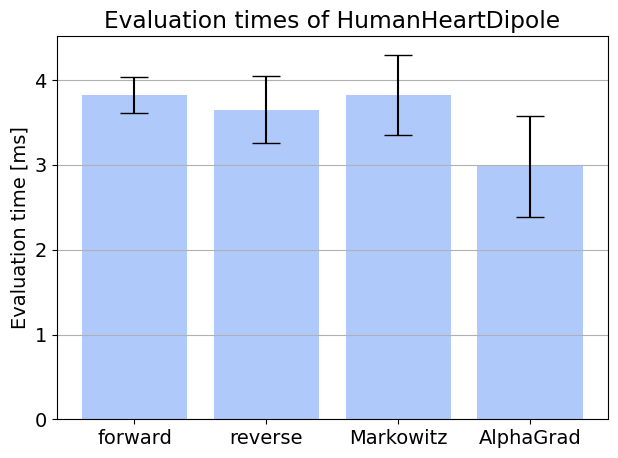

In [7]:
# Order: fwd, rev, mM, cc
means = jnp.array([3.8236873149871826, 3.6495230197906494, 3.825319290161133, 2.9825470447540283])
stds = jnp.array([0.2087354212999344, 0.39476415514945984, 0.47684094309806824, 0.6004145741462708])
x_pos = jnp.arange(len(means))
modes = ["forward", "reverse", "Markowitz", "AlphaGrad"]


fig, ax = plt.subplots()
ax.bar(x_pos, means, yerr=stds, align="center", alpha=0.5, 
            ecolor="black", color="#6096f6", capsize=10)
    
ax.set_ylabel("Evaluation time [ms]", fontsize=14)
ax.set_xticks(x_pos)
ax.set_xticklabels(modes, fontsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.set_title(f"Evaluation times of HumanHeartDipole")
ax.yaxis.grid(True)  
# ax.set_ylim((0.025, 0.04))

plt.tight_layout()